# **Object Detection with Faster R-CNN**

### Name: Jason Misquitta
### Reg No: 20BAI1173

Faster R-CNN is a method for object detection that uses region proposal. I will use Faster R-CNN pre-trained on the coco dataset and try to detect several objects by name and to use the likelihood of the object prediction being correct.

## Downloading the Images :

In [ ]:
! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-Coursera/images%20/images_part_5/DLguys.jpeg
! wget https://www.ajot.com/images/uploads/article/quantas-car-v-plane-TAKE-OFF.jpg
! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-Coursera/images%20/images_part_5/istockphoto-187786732-612x612.jpeg
! wget https://cdn.webrazzi.com/uploads/2015/03/andrew-ng1.jpg

--2022-11-07 17:06:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-Coursera/images%20/images_part_5/DLguys.jpeg
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48572 (47K) [image/jpeg]
Saving to: ‘DLguys.jpeg.1’

DLguys.jpeg.1       100%[===================>]  47.43K   274KB/s    in 0.2s    

2022-11-07 17:06:41 (274 KB/s) - ‘DLguys.jpeg.1’ saved [48572/48572]

--2022-11-07 17:06:41--  https://www.ajot.com/images/uploads/article/quantas-car-v-plane-TAKE-OFF.jpg
Resolving www.ajot.com (www.ajot.com)... 104.26.0.133, 104.26.1.133, 172.67.69.178, ...
Connecting to www.ajot.com (www.ajot.com)|104.26.0.133|:443... 

### **Import Libraries and Define Auxiliary Functions**

#### Install and import Condacolab

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:28
🔁 Restarting kernel...


In [ ]:
! conda install pytorch=1.1.0 torchvision -c pytorch -y

Solving environment: | failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [ ]:
import torchvision
from torchvision import  transforms 
import torch
from torch import no_grad

Importing <code>request</code> library for getting data from the web


In [ ]:
import requests

Importing libraries  for image processing and visualization


In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### **Training for Object Detection**
<p>Object detection is based on two principles. The first is the learnable parameters in the created rectangle (box), and the second is the size of the created box (coordinate information). While the model is being trained, ground truth and prediction values ​​are evaluated with the difference of squares. Evaluations depend on the size of the ground truth rectangles created through functions. The functions calculate the difference between the ground truth box and the predicted rectangle.</p>

This function will assign a string name to a predicted class and eliminate predictions whose likelihood  is under a threshold.


In [ ]:
def get_predictions(pred, threshold=0.8, objects=None):
    """
    pred: a list where each element contains a tuple that corresponds to information about  the different objects; Each element includes a tuple with the class yhat, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    image : frozen surface
    predicted_classes: a list where each element contains a tuple that corresponds to information about  the different objects; Each element includes a tuple with the class name, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    thre
    """

    predicted_classes= [(COCO_INSTANCE_CATEGORY_NAMES[i],p,[(box[0], box[1]), (box[2], box[3])]) for i,p,box in zip(list(pred[0]['labels'].numpy()),pred[0]['scores'].detach().numpy(),list(pred[0]['boxes'].detach().numpy()))]
    predicted_classes=[  stuff  for stuff in predicted_classes  if stuff[1]>threshold ]
    
    if objects  and predicted_classes :
        predicted_classes=[ (name, p, box) for name, p, box in predicted_classes if name in  objects ]
    return predicted_classes


Draws box around each object


In [ ]:
def draw_box(pred_class, img, rect_th=2, text_size=0.5, text_th=2, download_image=False, img_name="img"):
    """
    predicted_classes: a list where each element contains a tuple that corresponds to information about the different objects; Each element includes a tuple with the class name, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    image : frozen surface 

    """
    image = (np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)), 0, 1), cv2.COLOR_RGB2BGR), 0, 1) * 255).astype(np.uint8).copy()

    for predicted_class in pred_class:
      
      label=predicted_class[0]
      probability=predicted_class[1]
      box=predicted_class[2]
      t = round(box[0][0].tolist())
      l = round(box[0][1].tolist())
      r = round(box[1][0].tolist())
      b = round(box[1][1].tolist())

      # Giving brief information about rectange, class and probability.
      from colorama import Fore
      from colorama import Style
      print(f"\nLabel: {Fore.GREEN}{label}{Style.RESET_ALL}")
      print(f"Box coordinates: {t}, {l}, {r}, {b}")
      print(f"Probability: {probability}")

      # Drawing rectangle and adding text on the picture based on their class and size.
      cv2.rectangle(image, (t, l), (r, b), (0, 255, 0), rect_th)
      cv2.rectangle(image, (t, l), (t+110, l+17), (255, 255, 255), -1)
      cv2.putText(image, label, (t+10, l+12),  cv2.FONT_HERSHEY_SIMPLEX, 
                  text_size, (0,255,0), thickness=text_th)
      cv2.putText(image, label+": "+str(round(probability, 2)), 
                  (t+10, l+12),  cv2.FONT_HERSHEY_SIMPLEX, text_size, 
                  (0, 255, 0),thickness=text_th)

    # Plotting image
    image = np.array(image)
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if download_image:
      plt.savefig(f'{img_name}.png')
    else:
      pass
    plt.show()
    
    del(img)
    del(image)

This function  will speed up the code by freeing memory:


In [ ]:
def save_RAM(image_=False):
    global image, img, pred
    torch.cuda.empty_cache()
    del(img)
    del(pred)
    if image_:
        image.close()
        del(image)


## **Load Pre-trained Faster R-CNN**

Faster R-CNN is a model that predicts both bounding boxes and class scores for potential objects in the image pre-trained on COCO. Faster R-CNN model with a ResNet-50-FPN backbone from "The Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks" paper.

In [ ]:
model_ = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model_.eval()
for name, param in model_.named_parameters():
    param.requires_grad = False
print("done")

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


done


The function calls Faster R-CNN  model but saves RAM:


In [ ]:
def model(x):
    with torch.no_grad():
        yhat = model_(x)
    return yhat

Here are the 91 classes.


In [ ]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
len(COCO_INSTANCE_CATEGORY_NAMES)


91

## **Object Localization**

In Object Localization, we locate the presence of objects in an image and indicate the location with a bounding box. 

<p>We will create a transform object to convert the image to a tensor.</p>


In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
img = transform(image)
img

tensor([[[0.5765, 0.5843, 0.5961,  ..., 0.9961, 0.9961, 0.9961],
         [0.6314, 0.6353, 0.6392,  ..., 0.9961, 0.9961, 0.9961],
         [0.6706, 0.6706, 0.6706,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [0.7020, 0.6980, 0.7020,  ..., 0.9765, 0.9765, 0.9804],
         [0.6784, 0.6745, 0.6824,  ..., 0.9804, 0.9804, 0.9843],
         [0.6275, 0.6392, 0.6471,  ..., 0.9804, 0.9804, 0.9804]],

        [[0.5490, 0.5569, 0.5686,  ..., 0.9961, 0.9961, 0.9961],
         [0.6039, 0.6078, 0.6118,  ..., 0.9961, 0.9961, 0.9961],
         [0.6431, 0.6431, 0.6431,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [0.7176, 0.7176, 0.7216,  ..., 0.9373, 0.9373, 0.9333],
         [0.6902, 0.6941, 0.7020,  ..., 0.9412, 0.9412, 0.9373],
         [0.6745, 0.6863, 0.6941,  ..., 0.9412, 0.9412, 0.9412]],

        [[0.5804, 0.5882, 0.6000,  ..., 0.9961, 0.9961, 0.9961],
         [0.6353, 0.6392, 0.6431,  ..., 0.9961, 0.9961, 0.9961],
         [0.6745, 0.6745, 0.6745,  ..., 0.9961, 0.9961, 0.

We can make a prediction : The output is a dictionary with several predicted classes, the probability of belonging to that class and the coordinates of the bounding box corresponding to that class.

In [ ]:
pred = model([img])

In [ ]:
len(pred[0]['labels'])

2

We have 2 different class predictions, ordered by likelihood scores for potential objects.

In [ ]:
pred[0]['labels']

tensor([ 1, 15])

We have the likelihood of each class:


In [ ]:
pred[0]['scores']

tensor([0.9994, 0.1343])

<p>The class number corresponds to the index of the list with the corresponding  category name.</p>


In [ ]:
index=pred[0]['labels'][0].item()
COCO_INSTANCE_CATEGORY_NAMES[index]

'person'

We have the coordinates of the bounding box.

In [ ]:
bounding_box=pred[0]['boxes'][0].tolist()
bounding_box

[76.90819549560547, 50.73971939086914, 365.5072937011719, 380.4656677246094]

These components correspond to the top-left corner and bottom-right corner of the rectangle, more precisely: **top(t), left(l), bottom(b), right(r)**.

We need to round them, otherwise we can't show it on picure.

In [ ]:
t, l, r, b = [round(x) for x in bounding_box]
print(t, l, r, b)

77 51 366 380


We convert the tensor to an OpenCV array and plot an image with the box:

In [ ]:
img_plot=(np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)), 0, 1), cv2.COLOR_RGB2BGR), 0, 1) * 255).astype(np.uint8)
cv2.rectangle(img_plot, (t, l), (r, b), (0, 255, 0), 10) # Draw Rectangle with the coordinates
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img_plot, cv2.COLOR_BGR2RGB))
plt.show()
del img_plot, t, l, r, b

We can localize objects, we do this using the function <code>get_predictions</code>. The input  is the predictions <code>pred</code> and the <code>objects</code> you would like to localize.

<b>Loss equation:</b>

$$||box\ - \hat{box}||^2 = (y_{min} - \hat{y_{min}})^2 + (y_{max} - \hat{y_{max}})^2 + (x_{min} - \hat{x_{min}})^2 + (x_{max} - \hat{x_{max}})^2$$

<br>

In [ ]:
pred_class=get_predictions(pred, objects="person")
draw_box(pred_class, img)

del pred_class

We can set a threshold.  Here we set the threshold 1 i.e. 100% likelihood. :

In [ ]:
get_predictions(pred, threshold=1, objects="person")

[]

Here we have no output as the likelihood is not 100%. Let's try a threshold of 0.98 and use the function draw_box to draw the box and plot the class and it's rounded likelihood.

In [ ]:
pred_thresh=get_predictions(pred, threshold=0.98, objects="person")
draw_box(pred_thresh, img, download_image=True, img_name="andrew_BOX")
del pred_thresh

Delete objects to save memory, we will run this after every cell:

In [ ]:
save_RAM(image_=True)

We can locate multiple objects, consider the following image, we can detect the people in the image.

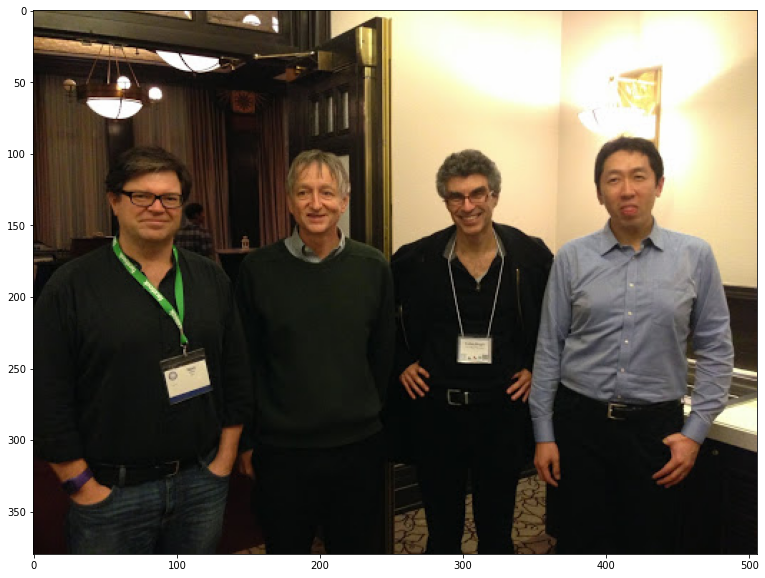

In [ ]:
img_path='DLguys.jpeg'
image = Image.open(img_path)
image.resize([int(half * s) for s in image.size])
plt.figure(figsize=(15, 10))
plt.imshow(np.array(image))
plt.show()

We can set a threshold to detect the object, 0.9 seems to work.


Label: person
Box coordinates: 347, 84, 495, 374
Probability: 0.9997990727424622

Label: person
Box coordinates: 250, 96, 365, 374
Probability: 0.999697208404541

Label: person
Box coordinates: 2, 95, 151, 369
Probability: 0.9996185302734375

Label: person
Box coordinates: 134, 94, 257, 377
Probability: 0.9995379447937012


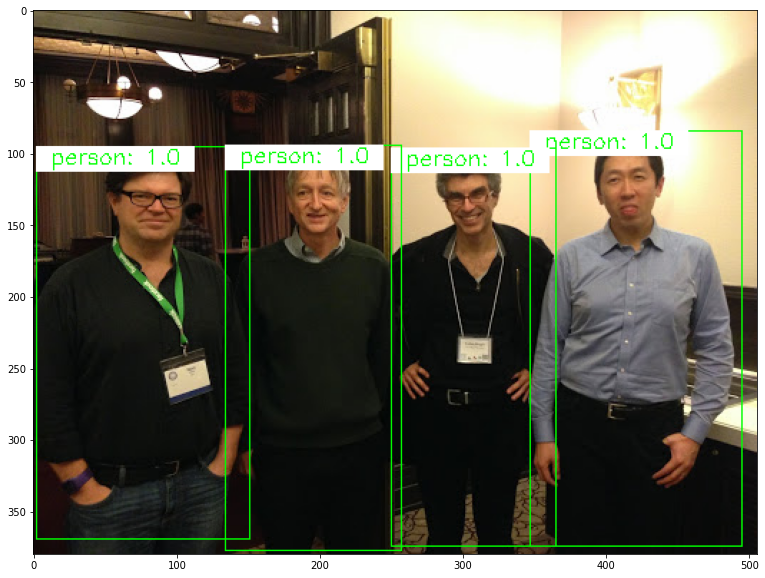

In [ ]:
img = transform(image)
pred = model([img])
pred_thresh=get_predictions(pred, threshold=0.8)
draw_box(pred_thresh, img, rect_th=1, text_size= 0.5, text_th=1)

del pred_thresh

If we set the threshold too low, we will detect objects that are not there.


Label: person
Box coordinates: 347, 84, 495, 374
Probability: 0.9997990727424622

Label: person
Box coordinates: 250, 96, 365, 374
Probability: 0.999697208404541

Label: person
Box coordinates: 2, 95, 151, 369
Probability: 0.9996185302734375

Label: person
Box coordinates: 134, 94, 257, 377
Probability: 0.9995379447937012

Label: person
Box coordinates: 101, 134, 129, 175
Probability: 0.798028826713562

Label: person
Box coordinates: 104, 134, 123, 156
Probability: 0.38920891284942627

Label: bottle
Box coordinates: 145, 157, 151, 167
Probability: 0.38045617938041687

Label: sink
Box coordinates: 472, 266, 505, 306
Probability: 0.3547811210155487

Label: handbag
Box coordinates: 57, 161, 129, 291
Probability: 0.2620069086551666

Label: chair
Box coordinates: 26, 158, 55, 171
Probability: 0.2311238795518875

Label: handbag
Box coordinates: 51, 159, 117, 240
Probability: 0.22351530194282532

Label: book
Box coordinates: 88, 237, 126, 277
Probability: 0.2159241884946823

Label: backpack


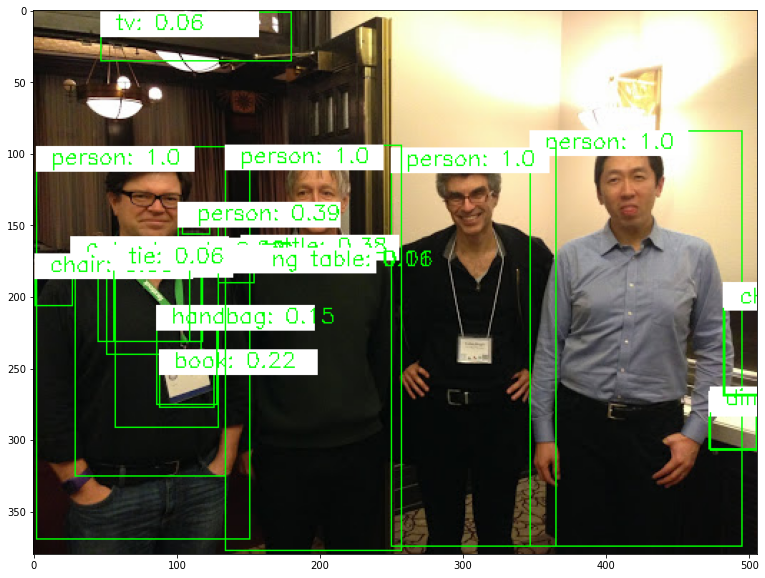

In [ ]:
pred_thresh=get_predictions(pred,threshold=0.01)
draw_box(pred_thresh, img, rect_th= 1, text_size=0.5, text_th=1)

del pred_thresh

The following line will speed up the code by using less RAM.

In [ ]:
save_RAM(image_=True)

## **Object Detection**

In Object Detection, we find the classes as well detect the objects in an image. Consider the following image:

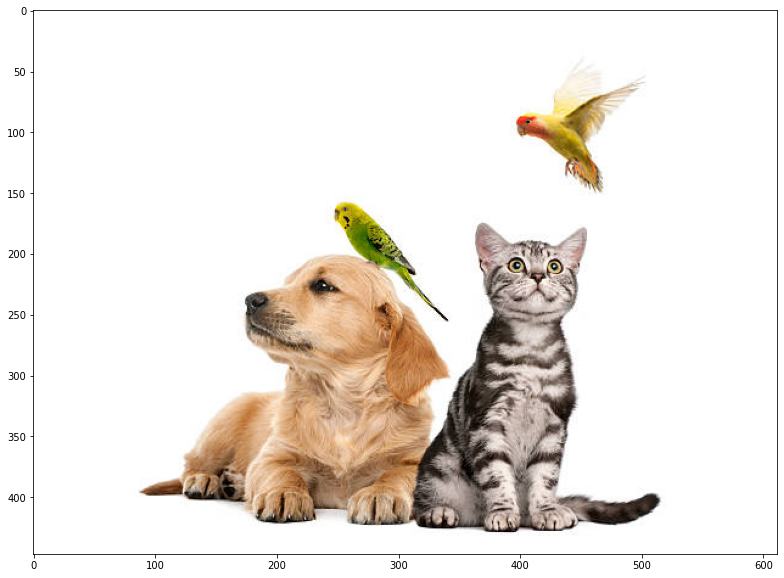

In [ ]:
img_path='istockphoto-187786732-612x612.jpeg'
image = Image.open(img_path)
image.resize( [int(half * s) for s in image.size])
plt.figure(figsize=(15, 10))
plt.imshow(np.array(image))
plt.show()
del img_path

If we set a threshold, we can detect all objects whose likelihood is above that threshold.


Label: bird
Box coordinates: 396, 41, 500, 147
Probability: 0.9976320266723633

Label: cat
Box coordinates: 299, 167, 459, 437
Probability: 0.997433602809906

Label: dog
Box coordinates: 112, 191, 345, 421
Probability: 0.9929460883140564

Label: bird
Box coordinates: 244, 160, 337, 264
Probability: 0.9781111478805542


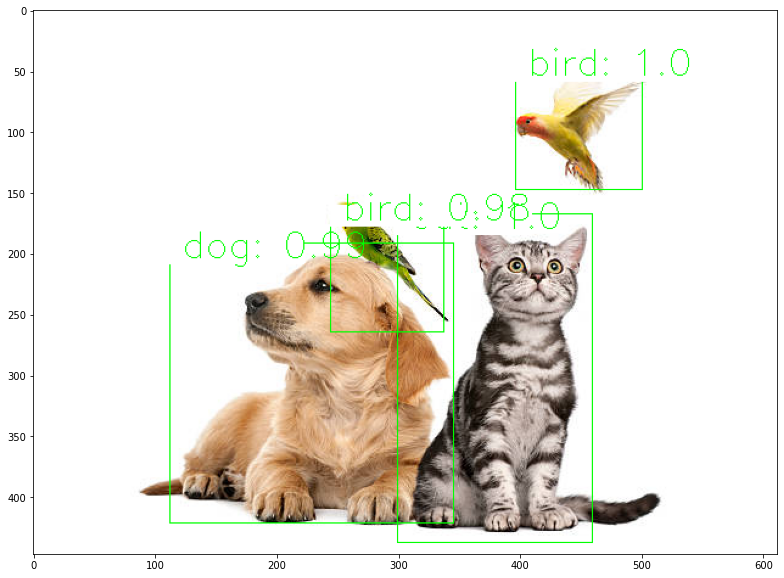

In [ ]:
img = transform(image)
pred = model([img])
pred_thresh=get_predictions(pred,threshold=0.97)
draw_box(pred_thresh,img,rect_th=1, text_size=1, text_th=1, download_image=True, img_name="dog_cat_bird_BOX")

del pred_thresh

We can specify the objects we would like to classify, for example, cats and dogs :


Label: cat
Box coordinates: 299, 167, 459, 437
Probability: 0.997433602809906

Label: dog
Box coordinates: 112, 191, 345, 421
Probability: 0.9929460883140564


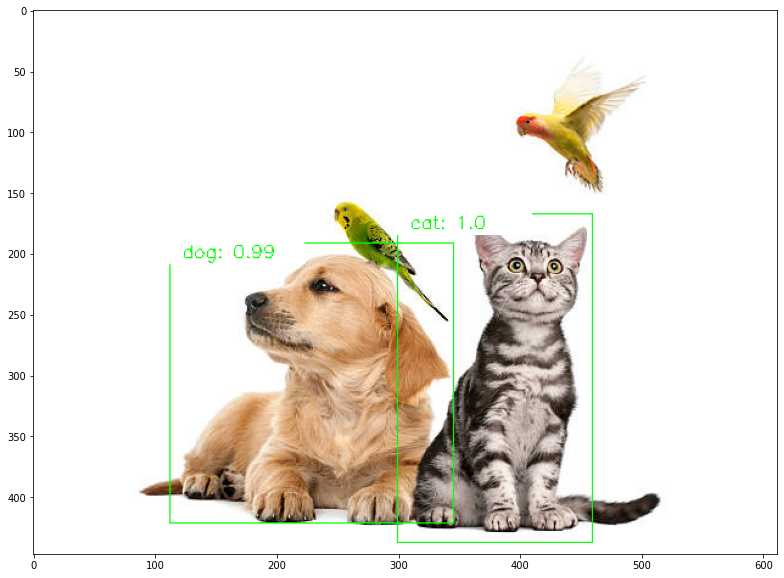

In [ ]:
# img = transform(image)
# pred = model([img])
pred_obj=get_predictions(pred, objects=["dog","cat"])
draw_box(pred_obj, img,rect_th=1, text_size= 0.5, text_th=1)
del pred_obj

If we set the threshold too low, we may detect objects with a low likelihood of being correct.  Here, we set the threshold to 0.7, and we incorrectly detect a cat.


Label: cat
Box coordinates: 299, 167, 459, 437
Probability: 0.997433602809906

Label: dog
Box coordinates: 112, 191, 345, 421
Probability: 0.9929460883140564

Label: cat
Box coordinates: 111, 181, 392, 423
Probability: 0.7116270661354065


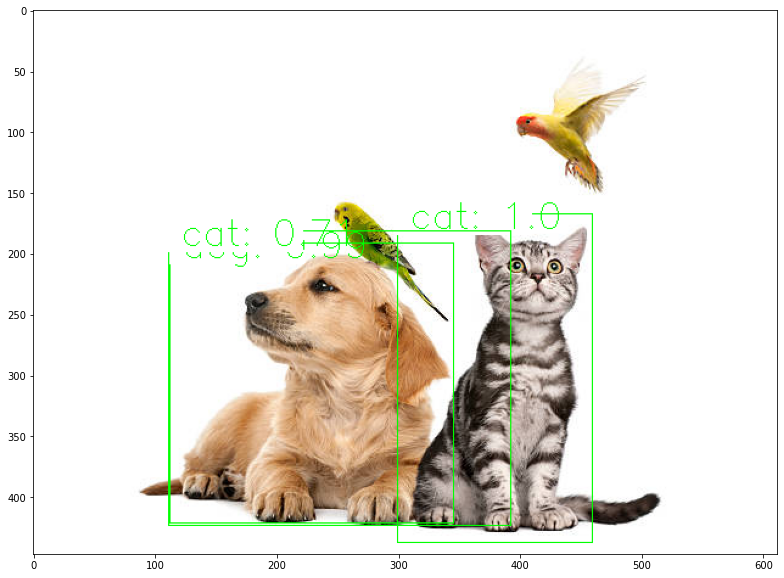

In [ ]:
# img = transform(image)
# pred = model([img])
pred_thresh=get_predictions(pred, threshold=0.70, objects=["dog", "cat"])
draw_box(pred_thresh, img, rect_th= 1, text_size=1, text_th=1)

del pred_thresh

In [ ]:
save_RAM(image_=True)

We can detect other objects. Consider the following image:  We can detect cars and airplanes

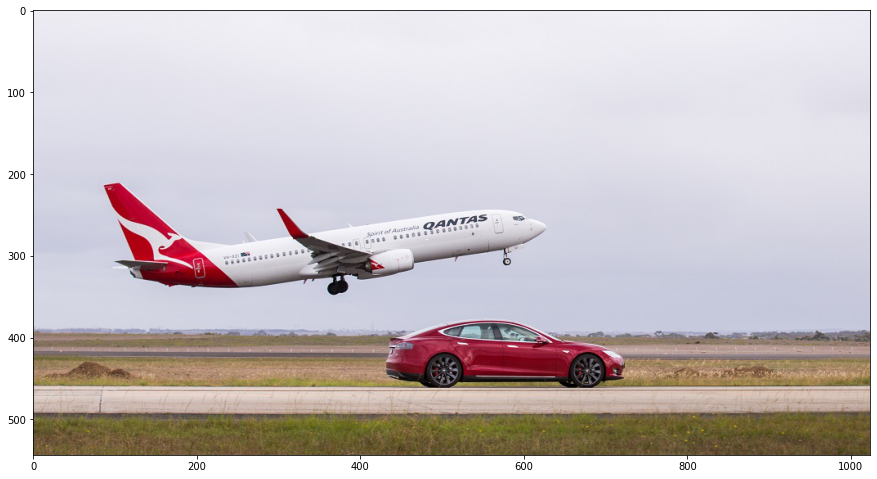

In [ ]:
img_path='quantas-car-v-plane-TAKE-OFF.jpg'
image = Image.open(img_path)
image.resize( [int(half * s) for s in image.size])
plt.figure(figsize=(15, 10))
plt.imshow(np.array(image))
plt.show()
del img_path


Label: car
Box coordinates: 433, 377, 723, 460
Probability: 0.9993621706962585

Label: airplane
Box coordinates: 62, 213, 614, 351
Probability: 0.9987056255340576


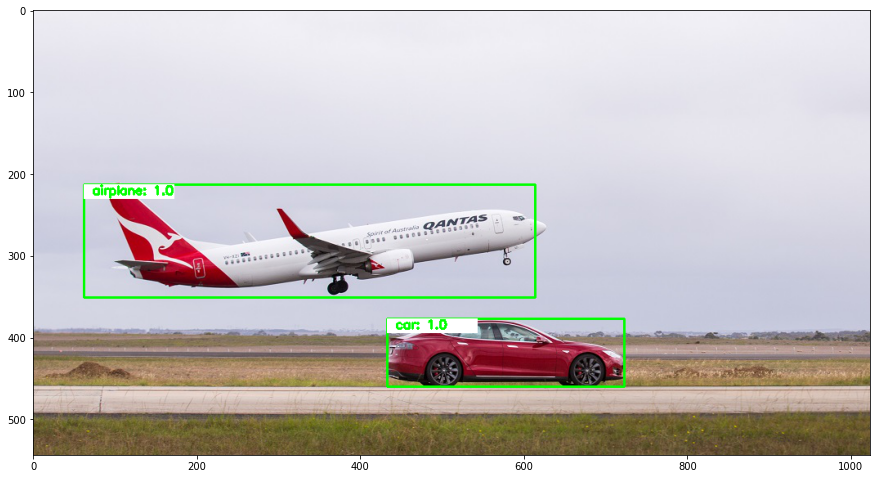

In [ ]:
img = transform(image)
pred = model([img])
pred_thresh=get_predictions(pred, threshold=0.997)
draw_box(pred_thresh, img, download_image=True, img_name="car_plane_BOX")
del pred_thresh

In [ ]:
save_RAM(image_=True)


## **Test Model With my Own Image**

In [ ]:
from pathlib import Path
print("Directory Path:", Path().absolute())

Directory Path: /content


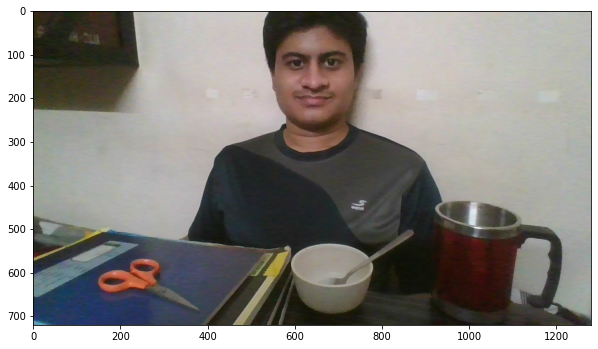

In [ ]:
img_path = str(Path().absolute())+'/me.jpg'
image = Image.open(img_path)
plt.figure(figsize=(10, 15))
plt.imshow(np.array(image))
plt.show()


Label: person
Box coordinates: 319, 11, 957, 619
Probability: 0.9976240992546082

Label: scissors
Box coordinates: 153, 568, 374, 688
Probability: 0.9965824484825134

Label: cup
Box coordinates: 922, 427, 1193, 709
Probability: 0.9925355911254883

Label: bowl
Box coordinates: 581, 529, 815, 693
Probability: 0.9809929728507996


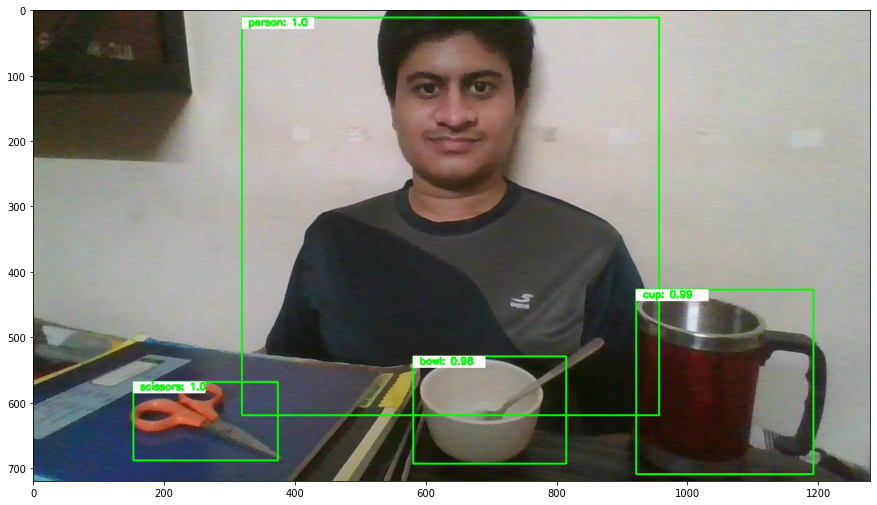

In [ ]:
img = transform(image )
pred = model(img.unsqueeze(0))
pred_thresh=get_predictions(pred,threshold=0.95)
draw_box(pred_thresh, img, download_image=True, img_name="me_BOX")

## **Result :**

The model accurately identifies 4 objects (person, scissors, bowl, cup) in the selfie clicked by me. Thus, it is a successful implementation of object detection.